In [2]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
# import cdd
import math
import cvxpy as cvx
# from collections import deque
import random
import warnings

warnings.filterwarnings('ignore', category=FutureWarning)

# Modulus of families of maximal increasing subsequences

### Information
Student: Nalen Rangarajan

Graduate Mentor: Ngoc Huy Truong\
Faculty Mentor: Pietro Poggi-Corradini

under NODE Group activities

### Items Read
Mathematics of Networks: Modulus Theory and Convex Optimization, Nathan Albin and Pietro Poggi-Corradini

Finding a Minimum Independent Dominating Set in a Permutation Graph, Mikhail J. Atallah et al.

Maintenance of Configurations in the plane, Mark H. Overmars and Jan van Leeuwen

Combinatorics and Random Matrix Theory, Jinho Baik

### Permutations

An ordering of elements

Consider a permutation of the elements $1,\dots,8$

$$
\pi = 2\ 7\ 1\ 6\ 4\ 3\ 5\ 8\
$$

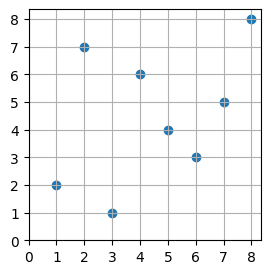

In [6]:
pi =  [2, 7, 1, 6, 4, 3, 5, 8]
x = range(1,9)

# initialize figure
fig, fig = plt.subplots(figsize=(3, 3))
    
plt.scatter(x,pi)

# Set the ticks to be at the edges of the bins.
fig.set_xticks(range(0,9))
fig.set_yticks(range(0,9))
plt.grid(True)

<table>
<tr>
<td>
<img src="images/NalenDRPImages/Permutation8.png" width="400">
</td>
</tr>
</table>

### Maximal Increasing Subsequences (MISS)

A subsequence of elements in a permutation that cannot be extended

Given our permutation $2\ 7\ 1\ 6\ 4\ 3\ 5\ 8\,$

$2\ 4\ 5\ 8\ $ is a maximal increasing subsequence 

that corresponds to the indices $1\ 5\ 7\ 8\ $

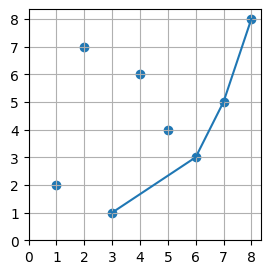

In [9]:
#small helper image
pi =  [2, 7, 1, 6, 4, 3, 5, 8]
x = range(1,9)

max = [2, 4, 5, 8]
maxI = [1, 5, 7, 8]

MinMaxMISS = [1, 3, 5, 8]
MinMaxMISSI = [3, 6, 7, 8]

# initialize figure
fig, fig = plt.subplots(figsize=(3, 3))
    
plt.scatter(x,pi)
#plt.plot(badI,bad)
#plt.plot(maxI,max)
plt.plot(MinMaxMISSI, MinMaxMISS)

# Set the ticks to be at the edges of the bins.
fig.set_xticks(range(0,9))
fig.set_yticks(range(0,9))
plt.grid(True)

<table>
<tr>
<td>
<img src="images/NalenDRPImages/Permutation8MISS.png" width="400">
</td>
</tr>
</table>

### Families

$\Gamma$ represents a family of objects $\gamma$

We then define $\mathcal{N}$ to be the usage matrix of objects in $\Gamma$

With the previous MISS the row entry in $\mathcal{N}$ would 

be $\begin{bmatrix} 1 & 0 & 0 & 0 & 1 & 0 & 1 & 1 \end{bmatrix}$

### Weightings

We define our node density $\rho \in \mathbb{R}_{+}^{N}$ and the $\rho$-length as $\ell_\rho(\gamma) := \sum_{v = 1}^{N} \mathcal{N}(\gamma, v)\rho(v)$ (the "cost" of a MISS)

And admissibility as $\rho$ is admissible for $\Gamma$ if $\ell_{\rho}(\gamma) \geq 1 \: \: \:\forall \gamma \in \Gamma$

We then define the p-Modulus as $\text{Mod}_p(\Gamma) := \inf\limits_{\rho \in \text{Adm}(\Gamma)}\sum_{v=1}^{\text{N}}\rho(v)^p$

For example:

We see that the 1-Modulus is defined as $\text{Mod}_1(\Gamma) := \inf\limits_{\rho \in \text{Adm}(\Gamma)}\sum_{v=1}^{\text{N}}\rho(v)$

And the 2-Modulus is defined as $\text{Mod}_2(\Gamma) := \inf\limits_{\rho \in \text{Adm}(\Gamma)}\sum_{v=1}^{\text{N}}\rho(v)^2$

### Two algorithms for computing Modulus:
+ Basic Algorithm
+ Plus-1 Algorithm

<table>
<tr>
<td>
<img src="images/basic.png" width="400">
</td>
<td>
<img src="images/new_plusone.png" width="400">
</td>
</tr>
</table>

The Basic Algorithm results in a convex optimization problem

While the Plus-1 Algorithm results in a probabilistic approach

### Shortest Path

<table>
<tr>
<td>
<img src="images/augmenteddfs.png" width="600">
</td>
</tr>
</table>

### The Problem

Another way to find MISS with minimum weight in a permutation graph is through Djikstra's algorithm

In general, these methods are slow

Goal: Find a more efficient algorithm for computing the shortest path

### Our Implementation

From here we now turn to the process of implementing an algorithm to find a minimum weight MISS from Atallah et al and Mark H. Overmars and Jan van Leeuwen

### Notation

Before getting into the data structure, let's first cover some notation

+ We consider a sequence $ a_1,\dots,a_n $, let $ B_i $ be the set of shortest MISS that end with $ a_i $
+ Every sequence present in $ B_i $ will be of the same length, this length is denoted label(i)
+ Next we define predecessor(i) as follows
    + If label(i) > 1, then there exists some sequence in $B_i$ that ends with $a_{\text{predecessor}(i)}a_i$
    + If label(i) = 1, then predecessor(i) = $\emptyset$
+ Next we define a point $p_i$ is said to dominate $p_j$ if x($p_i$) > x($p_j$) $\land$ y($p_i$) > y($p_j$)
+ DOM($p_i$) denotes the set of points that are dominated by $p_i$
+ $p_i$ is considered a maximum of $P$ if no other point $p_j \in  P$ dominates it, MAX($P$) is comprised of these points $p_i$

For example if we consider $\pi = 2\ 7\ 1\ 6\ 4\ 3\ 5\ 8\ $

Then $B_4 = \{ [\ 2\ 6 ]\,\ [\ 1\ 6\ ]\ \}$

label(4) = 2

predecessor(4) = {1} = 3

### Idea

We know from Overmars and van Leeuwen that there exists a data structure that allows us to dynamically maintain the maxima of a set of points in a plane

This data structure should support the following operations
+ Down
+ Up
+ Concatenate
+ Split

### Algorithm

Input: A sequence $ a_1,\dots,a_n $

Output: A minimum-length MISS of $ a_1,\dots,a_n $

Method: We first set label(1) = 1 and predecessor(1) = $\emptyset$

From there we "sweep" a line $L$ across the graph of our points

At each step we construct a tree $T$ comprised of the points on the left of $L$

As we sweep we ensure that we maintain the maxima and the smallest-labelled maximum of the points to the left of $L$ at the root of $T$

When a certain point is encountered we complete the following steps

### Step 1

First, we apply the split operation on our tree $T$ with the point $p_i$

Such that we have two trees, $T_{up}$ and $T_{down}$, $T_{down}$ contain MAX(DOM($p_i$)) and the smallest-labelled point of the MAX(DOM($p_i$))

### Step 2

If MAX(DOM($p_i$)) at the root of $T_{down}$ is the empty set then label(i) must be 1 and predecessor(i) must be $\emptyset$

Otherwise we set predecessor(i) := the index of the smallest-labeled point $p_j$ of the MAX(DOM($p_i$)), and label(i) is equal to 1 + label(j)

### Step 3

Lastly we rebuild $T$ from step 1 with the Concatenate operation using $T_{up}$ and $T_{down}$

From there we insert $p_i$ to get $T'$

### After Completing the Sweep

$\beta$ := index k of the smallest label in MAX($P$)

From here we then trace $\beta$ backwards as follows:
+ If predecessor(k) != $\emptyset$ then 
    + $\beta := a_{\text{predecessor}(k)}\beta$
    + $k={\text{predecessor}(k)}$
+ If predecessor(k) = $\emptyset$ then output $\beta$

### Example

Now let's go through an example of this

$\pi = 2\ 7\ 1\ 6\ 4\ 3\ 5\ 8\ $

### Iteration 1:

$\pi = 2\ 7\ 1\ 6\ 4\ 3\ 5\ 8\ $

<table>
<tr>
<td>
<img src="images/NalenDRPImages/Permutation8.png" width="300">
</td>
</tr>
</table>

We have an empty tree, so MAX(DOM($p_1$)) = $\emptyset$

So predecessor(1) = $\emptyset$ and label(1) = 1

### Iteration 2:

$\pi = 2\ 7\ 1\ 6\ 4\ 3\ 5\ 8\ $

<table>
<tr>
<td>
<img src="images/NalenDRPImages/MinMaxExample/Ex2.png" width="300">
</td>
<td>
<img src="images/NalenDRPImages/Permutation8.png" width="300">
</td>
</tr>
</table>

MAX(DOM($p_2$)) = {2}

So predecessor(2) = {2} = 1 and label(2) = 1 + 1 = 2

### Iteration 3:

$\pi = 2\ 7\ 1\ 6\ 4\ 3\ 5\ 8\ $

<table>
<tr>
<td>
<img src="images/NalenDRPImages/MinMaxExample/Ex3.png" width="300">
</td>
<td>
<img src="images/NalenDRPImages/Permutation8.png" width="300">
</td>
</tr>
</table>

MAX(DOM($p_3$)) = $\emptyset$

So predecessor(3) = $\emptyset$ and label(3) = 1

### Iteration 4:

$\pi = 2\ 7\ 1\ 6\ 4\ 3\ 5\ 8\ $

<table>
<tr>
<td>
<img src="images/NalenDRPImages/MinMaxExample/Ex4.png" width="300">
</td>
<td>
<img src="images/NalenDRPImages/Permutation8.png" width="300">
</td>
</tr>
</table>

MAX(DOM($p_4$)) = {2,1} and smallest is {1}

So predecessor(4) = {1} = 3 and label(4) = 1 + 1 = 2

### Iteration 5:

$\pi = 2\ 7\ 1\ 6\ 4\ 3\ 5\ 8\ $

<table>
<tr>
<td>
<img src="images/NalenDRPImages/MinMaxExample/Ex5.png" width="300">
</td>
<td>
<img src="images/NalenDRPImages/Permutation8.png" width="300">
</td>
</tr>
</table>

MAX(DOM($p_5$)) = {2,1} and smallest is {1}

So predecessor(5) = {1} = 3 and label(5) = 1 + 1 = 2

### Iteration 6:

$\pi = 2\ 7\ 1\ 6\ 4\ 3\ 5\ 8\ $

<table>
<tr>
<td>
<img src="images/NalenDRPImages/MinMaxExample/Ex6.png" width="300">
</td>
<td>
<img src="images/NalenDRPImages/Permutation8.png" width="300">
</td>
</tr>
</table>

MAX(DOM($p_6$)) = {2,1} and smallest is {1}

So predecessor(6) = {1} = 3 and label(6) = 1 + 1 = 2

### Iteration 7:

$\pi = 2\ 7\ 1\ 6\ 4\ 3\ 5\ 8\ $

<table>
<tr>
<td>
<img src="images/NalenDRPImages/MinMaxExample/Ex7.png" width="300">
</td>
<td>
<img src="images/NalenDRPImages/Permutation8.png" width="300">
</td>
</tr>
</table>

MAX(DOM($p_7$)) = {4,3} and smallest is {3}

So predecessor(7) = {3} = 6 and label(7) = 2 + 1 = 3

### Iteration 8:

$\pi = 2\ 7\ 1\ 6\ 4\ 3\ 5\ 8\ $

<table>
<tr>
<td>
<img src="images/NalenDRPImages/MinMaxExample/Ex8.png" width="300">
</td>
<td>
<img src="images/NalenDRPImages/Permutation8.png" width="300">
</td>
</tr>
</table>

MAX(DOM($p_8$)) = {7,6,5} and smallest is {5}

So predecessor(8) = {5} = 7 and label(8) = 3 + 1 = 4

### Result

Lastly, we see that MAX($P$) = {8} $\implies$ k = 8

So $\beta = {8} = p_8$ and k = predecessor(8) = 7

Then $\beta = a_7\beta =$ {5,8} and k = predecessor(7) = 6

Then $\beta = a_6\beta =$ {3,5,8} and k = predecessor(6) = 3

Then $\beta = a_3\beta =$ {1,3,5,8} and k = predecessor(3) = $\emptyset$

Since we reached $\emptyset$ we have that $\beta = $ {1,3,5,8} which is the shortest MISS

<table>
<tr>
<td>
<img src="images/NalenDRPImages/MinMaxExample/FinalTree.png" width="400">
</td>
<td>
<img src="images/NalenDRPImages/MinMaxExample/MISS.png" width="400">
</td>
</tr>
</table>

### How to Build the Tree T

What is an AVL Tree?

An AVL Tree is similar to the standard tree that you would encounter in graph theory

But
+ It is a binary tree, meaning each node has a maximum of two children
+ It has automatic rebalancing, so if the children of a node have a height difference > 1, we rebalance the tree

Let's take a look at an example of this

Using our earlier permutation $ \pi = 2\ 7\ 1\ 6\ 4\ 3\ 5\ 8\ $

With this new data structure we get this tree:

<table>
<tr>
<td>
<img src="images/NalenDRPImages/AVLPerm8.png" width="750">
</td>
<td>
<img src="images/NalenDRPImages/Permutation8.png" width="500">
</td>
</tr>
</table>

### Walkthrough of Implementation

Additionally, this implementation also allows for concatenation of permutations

Let's call the earlier permutation $\pi_1$ and we will denote $ \pi_2 = 12\ 9\ 10\ 11\ $

We first create two trees called $T_1$ and $T_2$ representing the two permutations $ \pi_1 $ and $ \pi_2 $

<table>
<tr>
<td>
<img src="images/NalenDRPImages/AVLPerm8.png" width="800">
</td>
<td>
<img src="images/NalenDRPImages/AVLPerm4.png" width="800">
</td>
</tr>
</table>

### Down
The first step in the concatenation of these two permutations is a process called Down

This function allows us to traverse through a tree in search for a specific node, or in our case the right-most node

<table>
<tr>
<td>
<img src="images/NalenDRPImages/Down.png" width="600">
</td>
</tr>
</table>

### Up

The next step upon finding this node is to insert $T_2$ as a child of this right-most node in $T_1$

From here we use the Up function to drag $T_2$ up into $T_1$

<table>
<tr>
<td>
<img src="images/NalenDRPImages/Up.png" width="500">
</td>
</tr>
</table>

<table>
<tr>
<td>
<img src="images/NalenDRPImages/BeginningUp.png" width="600">
</td>
</tr>
</table>

### Drag Up The Tree

<table>
<tr>
<td>
<img src="images/NalenDRPImages/Step2Up.png" width="600">
</td>
</tr>
</table>

<table>
<tr>
<td>
<img src="images/NalenDRPImages/Step3Up.png" width="600">
</td>
</tr>
</table>

<table>
<tr>
<td>
<img src="images/NalenDRPImages/Step4Up.png" width="600">
</td>
</tr>
</table>

<table>
<tr>
<td>
<img src="images/NalenDRPImages/Step5Up.png" width="600">
</td>
</tr>
</table>

### Finishing Touches

Lastly we ensure that our tree is balanced and from there we have completed the concatenation of $ \pi_1 $ and $ \pi_2 $

<table>
<tr>
<td>
<img src="images/NalenDRPImages/FinalTree.png" width="600">
</td>
<td>
<img src="images/NalenDRPImages/Permutation12.png" width="450">
</td>
</tr>
</table>

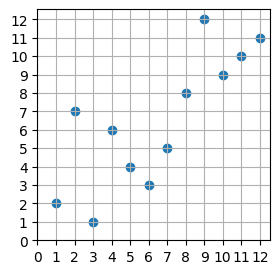

In [8]:
pi2 =  [2, 7, 1, 6, 4, 3, 5, 8, 12, 9, 10, 11]
x2 = range(1,13)

# initialize figure
fig, fig = plt.subplots(figsize=(3, 3))
    
plt.scatter(x2,pi2)

# Set the ticks to be at the edges of the bins.
fig.set_xticks(range(0,13))
fig.set_yticks(range(0,13))
plt.grid(True)

### Concatenate

This entire process is encompassed in the following pseudocode

<table>
<tr>
<td>
<img src="images/NalenDRPImages/Concatenate.png" width="350">
</td>
</tr>
</table>

### Split

This operation should allow us to split our data structure along a horizontal line in our graph (vertical line in our tree)

This should effectively be the inverse operation to Concatenate

### How does it work?

1. Trace a path $p$ down to a specific node $y$
2. Create two sets L and R
    + L = { n | father(n) $ \in $ p $ \land \exists $ x $ \in $ p where x.leftchild = n }
    + R = { n | father(n) $ \in $ p $ \land \exists $ x $ \in $ p where x.rightchild = n }
3. Each node in L and R is actually a tree, so these are Concatenated together
4. The result is two tree structures $T_{up}$ and $T_{down}$

### Future Work

+ Finish implementation of Split
+ See comparison between shortest_path and MinMax
    + We should see that MinMax operates in O($nlog^2n$)